### 1.Inspiration /Problem Statement:The goal is to use best regression model and predict Doctor's Consultation Fees.

#### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas_profiling as pp
sn.set()
RANDOM_SEED = 42

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

from subprocess import check_output
from sklearn import metrics
import joblib
import pickle
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import RobustScaler

In [2]:
import os
#Setting current working directory
os.chdir("/Users/Zahed/Doctor_Consultation_Fee Project")

### 2. Data Loading and Description

#### Importing Dataset

In [3]:
df=pd.read_csv("Final_Train.csv")
df.head()

Qualification           Experience  Rating  \
0           BHMS, MD - Homeopathy  24 years experience    1.00   
1    BAMS, MD - Ayurveda Medicine  12 years experience    0.98   
2  MBBS, MS - Otorhinolaryngology   9 years experience     NaN   
3             BSc - Zoology, BAMS  12 years experience     NaN   
4                            BAMS  20 years experience    1.00   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                                  Miscellaneous_Info  Fees  
0               100% 16 Feedback Kakkanad, Ernakulam   100  
1              98% 76 Feedback Whitefield, Bangalore   350  
2                                                NaN   300  
3  Bannerghatta Road, Bangalore ?250 Available on...   250  
4              100% 4 Feedback Keelkattalai, Chennai   250

#### Dimensionality Check

In [4]:
df.shape

(5961, 7)

#####   Observation:The dataset consist of 5961 observations of 7 columns.

#### Variables/Features of the Dataset

In [5]:
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

### 3.Preprocessing data

* Splitting the Place column values for a better and meaningfull data 
* Checking Missing Values.
* Displaying data types and their Unique values.
* Dropping insignigicant columns with less or no usefull data in it.
* Extracting the numeric values from Experience column
* Transforming Data/Converting Categorical Columns into Numerical Column.

In [6]:
#Splitting the Place column values for a better and meaningfull data 
df[['Place','Region','blanks']] = df['Place'].str.split(',',expand=True)
df

Qualification           Experience  Rating  \
0              BHMS, MD - Homeopathy  24 years experience    1.00   
1       BAMS, MD - Ayurveda Medicine  12 years experience    0.98   
2     MBBS, MS - Otorhinolaryngology   9 years experience     NaN   
3                BSc - Zoology, BAMS  12 years experience     NaN   
4                               BAMS  20 years experience    1.00   
...                              ...                  ...     ...   
5956                  MBBS, MS - ENT  19 years experience    0.98   
5957                            MBBS  33 years experience     NaN   
5958                            MBBS  41 years experience    0.97   
5959     MBBS, MD - General Medicine  15 years experience    0.90   
5960         BDS, MDS - Orthodontics  17 years experience    1.00   

                       Place           Profile  \
0                   Kakkanad         Homeopath   
1                 Whitefield          Ayurveda   
2            Mathikere - BEL    ENT Specialist   
3          Bannerghatta Road          Ayurveda   
4               Keelkattalai          Ayurveda   
...                      ...               ...   
5956            Basavanagudi    ENT Specialist   
5957            Nungambakkam  General Medicine   
5958  Greater Kailash Part 2  General Medicine   
5959          Vileparle West  General Medicine   
5960               Pitampura           Dentist   

                                     Miscellaneous_Info  Fees      Region  \
0                  100% 16 Feedback Kakkanad, Ernakulam   100   Ernakulam   
1                 98% 76 Feedback Whitefield, Bangalore   350   Bangalore   
2                                                   NaN   300   Bangalore   
3     Bannerghatta Road, Bangalore ?250 Available on...   250   Bangalore   
4                 100% 4 Feedback Keelkattalai, Chennai   250     Chennai   
...                                                 ...   ...         ...   
5956            98% 45 Feedback Basavanagudi, Bangalore   300   Bangalore   
5957                                                NaN   100     Chennai   
5958      97% 11 Feedback Greater Kailash Part 2, Delhi   600       Delhi   
5959  General Medical Consultation Viral Fever Treat...   100      Mumbai   
5960  Acrylic Partial Denture Crowns and Bridges Fix...   200       Delhi   

     blanks  
0      None  
1      None  
2      None  
3      None  
4      None  
...     ...  
5956   None  
5957   None  
5958   None  
5959   None  
5960   None  

[5961 rows x 9 columns]

In [7]:
#Having a copy of Original Data Frame for Future Analysis Purpose
new_df = df.copy()

#### Checking Missing Values

In [8]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
Region                  26
blanks                5960
dtype: int64

In [9]:
df.isnull().values.any()

True

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Qualification       5961 non-null   object 
 1   Experience          5961 non-null   object 
 2   Rating              2659 non-null   float64
 3   Place               5936 non-null   object 
 4   Profile             5961 non-null   object 
 5   Miscellaneous_Info  3341 non-null   object 
 6   Fees                5961 non-null   int64  
 7   Region              5935 non-null   object 
 8   blanks              1 non-null      object 
dtypes: float64(1), int64(1), object(7)
memory usage: 419.3+ KB


#### Observation:There are Missing Values in Rating & Miscellaneous_Info columns of the dataset

In [11]:
3302/5961*100

55.39339037074317

In [12]:
2620/5961*100

43.9523569870827

#### We can observe from the above calculation that there are about 55% of missing data in Rating column & 44% Missing data in Miscellaneous_Info Column.

In [13]:
# fill the missing values for the numerical terms-mean
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [14]:
# fill the missing values for the Categorical terms-mode
df['Place'] = df['Place'].fillna(df['Place'].mode()[0])
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])

In [15]:
#Dropping the columns which are most insignificant and also with most missing values in it
df.drop('blanks',axis='columns', inplace=True)
df.drop('Miscellaneous_Info',axis='columns', inplace=True)

In [16]:
df.isnull().sum()

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
Region           0
dtype: int64

#### Data Description

In [17]:
df.describe().T

count        mean         std   min         25%         50%     75%  \
Rating  5961.0    0.946435    0.052442  0.07    0.946435    0.946435    0.96   
Fees    5961.0  307.944640  190.920373  5.00  150.000000  300.000000  500.00   

          max  
Rating    1.0  
Fees    950.0

#### Observation: Minimum Consultation fee observed is 5 & the Maximum Consultation fee observed is 950

In [18]:
df.nunique()

Qualification    1420
Experience         64
Rating             52
Place             866
Profile             6
Fees               40
Region              9
dtype: int64

### Value Count Function

In [19]:
# print all of the data types and their Unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column)+ ':'+str(df[column].unique()))
        print(df[column].value_counts())
        print('---------------------------------------------------------------------------------------------')

Qualification:['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
BDS                                                                                                                488
BHMS                                                                                                               477
BAMS                                                                                                               471
MBBS                                                                                                               334
MBBS, MS - ENT                                                                                                     220
                                                 

In [20]:
# Extracting the numeric values from experience column
df['Year_of_Experience'] = df.Experience.str.extract('(\d+)')
df

Qualification           Experience    Rating  \
0              BHMS, MD - Homeopathy  24 years experience  1.000000   
1       BAMS, MD - Ayurveda Medicine  12 years experience  0.980000   
2     MBBS, MS - Otorhinolaryngology   9 years experience  0.946435   
3                BSc - Zoology, BAMS  12 years experience  0.946435   
4                               BAMS  20 years experience  1.000000   
...                              ...                  ...       ...   
5956                  MBBS, MS - ENT  19 years experience  0.980000   
5957                            MBBS  33 years experience  0.946435   
5958                            MBBS  41 years experience  0.970000   
5959     MBBS, MD - General Medicine  15 years experience  0.900000   
5960         BDS, MDS - Orthodontics  17 years experience  1.000000   

                       Place           Profile  Fees      Region  \
0                   Kakkanad         Homeopath   100   Ernakulam   
1                 Whitefield          Ayurveda   350   Bangalore   
2            Mathikere - BEL    ENT Specialist   300   Bangalore   
3          Bannerghatta Road          Ayurveda   250   Bangalore   
4               Keelkattalai          Ayurveda   250     Chennai   
...                      ...               ...   ...         ...   
5956            Basavanagudi    ENT Specialist   300   Bangalore   
5957            Nungambakkam  General Medicine   100     Chennai   
5958  Greater Kailash Part 2  General Medicine   600       Delhi   
5959          Vileparle West  General Medicine   100      Mumbai   
5960               Pitampura           Dentist   200       Delhi   

     Year_of_Experience  
0                    24  
1                    12  
2                     9  
3                    12  
4                    20  
...                 ...  
5956                 19  
5957                 33  
5958                 41  
5959                 15  
5960                 17  

[5961 rows x 8 columns]

In [21]:
#Sorting Experience column in ascendng order
df = df.sort_values(by='Year_of_Experience', ascending=True)
df

Qualification          Experience  \
3963                                                BDS  0 years experience   
5187  Get inspired by remarkable stories of people l...  0 years experience   
640                                                BAMS  0 years experience   
383                                                 BDS  0 years experience   
3804  Get inspired by remarkable stories of people l...  0 years experience   
...                                                 ...                 ...   
859                                                BAMS  9 years experience   
2199                                     MBBS, MS - ENT  9 years experience   
4772               BAMS, MD- Dravya Guna, PhD- Ayurveda  9 years experience   
4105  BDS, MDS - Orthodontics and Dentofacial Orthop...  9 years experience   
4984                                                BDS  9 years experience   

        Rating               Place         Profile  Fees      Region  \
3963  1.000000        Marathahalli         Dentist   200   Bangalore   
5187  0.946435          HSR Layout  Dermatologists   100   Bangalore   
640   0.946435        AS Rao Nagar        Ayurveda   100   Hyderabad   
383   0.946435           Chromepet         Dentist   100     Chennai   
3804  0.946435          HSR Layout  Dermatologists   100   Bangalore   
...        ...                 ...             ...   ...         ...   
859   0.946435        Andheri West        Ayurveda   100      Mumbai   
2199  0.946435        Chembur East  ENT Specialist   600      Mumbai   
4772  0.946435    Ramamurthy Nagar        Ayurveda   300   Bangalore   
4105  0.860000  Old Rajendra Nagar         Dentist   700       Delhi   
4984  0.946435          Masab Tank         Dentist   300   Hyderabad   

     Year_of_Experience  
3963                  0  
5187                  0  
640                   0  
383                   0  
3804                  0  
...                 ...  
859                   9  
2199                  9  
4772                  9  
4105                  9  
4984                  9  

[5961 rows x 8 columns]

In [22]:
# dropping Experience column which has duplicate values
df.drop('Experience',axis='columns', inplace=True)

In [23]:
df.head()

Qualification    Rating  \
3963                                                BDS  1.000000   
5187  Get inspired by remarkable stories of people l...  0.946435   
640                                                BAMS  0.946435   
383                                                 BDS  0.946435   
3804  Get inspired by remarkable stories of people l...  0.946435   

             Place         Profile  Fees      Region Year_of_Experience  
3963  Marathahalli         Dentist   200   Bangalore                  0  
5187    HSR Layout  Dermatologists   100   Bangalore                  0  
640   AS Rao Nagar        Ayurveda   100   Hyderabad                  0  
383      Chromepet         Dentist   100     Chennai                  0  
3804    HSR Layout  Dermatologists   100   Bangalore                  0

#### Applying Lable Encoder on Profile Column

In [24]:
# Applying Lable Encoder on Profile and Place Columns
le = LabelEncoder()
df['Profile'] = le.fit_transform(df['Profile'])
df['Region'] = le.fit_transform(df['Region'])
df.head(10)

Qualification    Rating  \
3963                                                BDS  1.000000   
5187  Get inspired by remarkable stories of people l...  0.946435   
640                                                BAMS  0.946435   
383                                                 BDS  0.946435   
3804  Get inspired by remarkable stories of people l...  0.946435   
380   MBBS, Diploma in Otorhinolaryngology (DLO), MS...  0.946435   
2682                                               BAMS  0.946435   
1470                                                BDS  0.946435   
4758  Get inspired by remarkable stories of people l...  0.946435   
2078  Get inspired by remarkable stories of people l...  0.946435   

              Place  Profile  Fees  Region Year_of_Experience  
3963   Marathahalli        1   200       0                  0  
5187     HSR Layout        2   100       0                  0  
640    AS Rao Nagar        0   100       5                  0  
383       Chromepet        1   100       1                  0  
3804     HSR Layout        2   100       0                  0  
380    Marine Lines        3   100       6                  0  
2682  Gulmohar Park        0   100       3                  0  
1470   Sowripalayam        1   100       2                  0  
4758     HSR Layout        2   100       0                  0  
2078     HSR Layout        2   100       0                  0

In [25]:
#Finding Co relation for all the columns
cor =df.corr()

<AxesSubplot:>

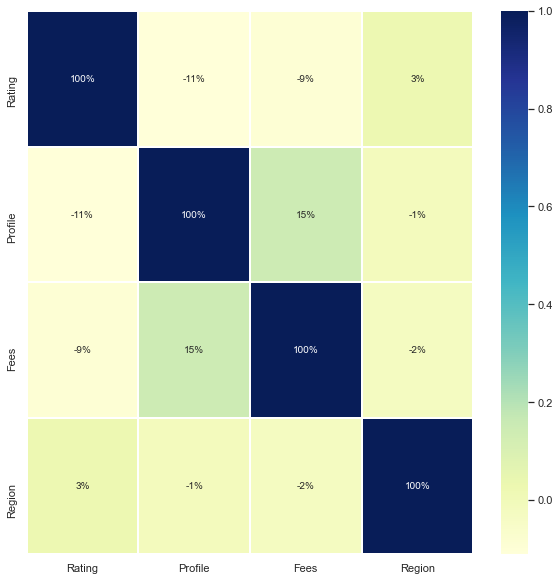

In [26]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sn.heatmap(cor,annot=True,linewidths=1,linecolor='white',cmap="YlGnBu",fmt='.0%')

#### Observation: we can see only profile has some co relation with the fees apart from prifle other columns aren't much co related with fees

### Data Overview Using Pandas Profiling for quick review on EDA

In [27]:
pp.ProfileReport(df)

### 4.Processing the Dataset For Data Analysis 

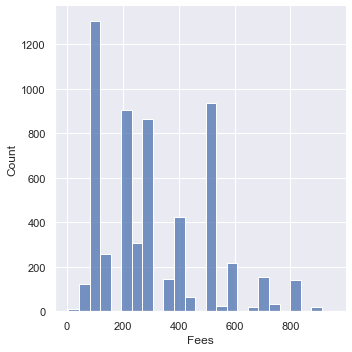

In [28]:
sn.displot(df["Fees"])

#### Observation:Most of the Fees Lies in the Range between 100-500

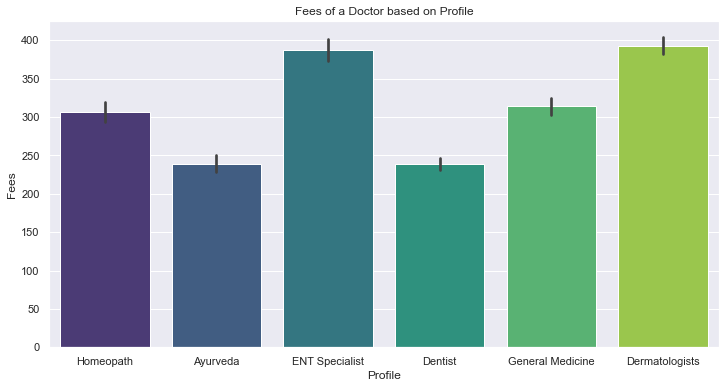

In [29]:
#using an Alternate Data Frame new_df(Original data frame without Label encoder for meaningFul bar plot)
plt.figure(figsize=(12,6))
plt.title("Fees of a Doctor based on Profile")
sn.barplot(x="Profile",y="Fees",data=new_df,palette='viridis')
plt.show()

#### Observation:We can see that ENT Specialist and Dermatologists are the ones with higher fees compared to other profiles.

<AxesSubplot:xlabel='Region', ylabel='Fees'>

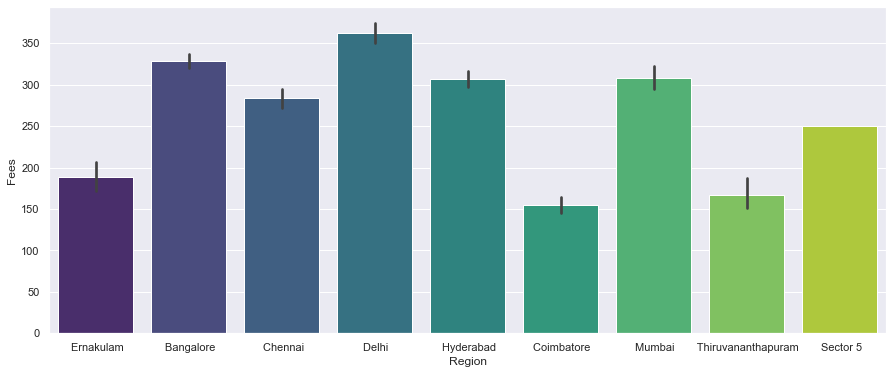

In [30]:
plt.subplots(figsize=(15,6))
sn.barplot(x='Region',y='Fees',data=new_df,palette='viridis')

#### Observation:We can see high fees in Delhi Region & Low fees in Coimbatore

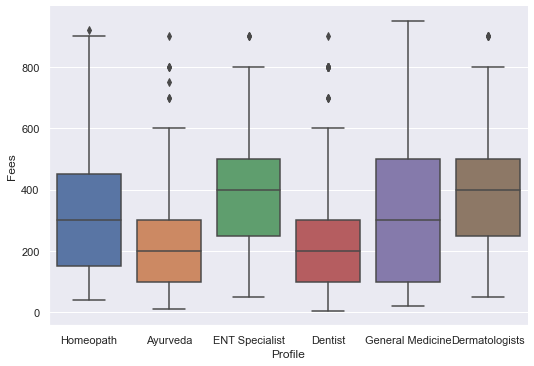

In [31]:
g=sn.catplot(x="Profile", y="Fees", kind="box", data=new_df)
g.fig.set_size_inches(8,5)

#### Observation:From the above graph we can see that the Average Price for the ENT Specialist & Dermatologists is More than Other Profiles

In [32]:
df.sort_values("Year_of_Experience")

Qualification    Rating  \
3963                                                BDS  1.000000   
2091                     MBBS, MD - Dermatology, FRGUHS  0.950000   
2850  BDS, MDS - Oral & Maxillofacial Surgery, Certi...  0.950000   
3502                                                BDS  0.946435   
3720                                     MBBS, MS - ENT  0.946435   
...                                                 ...       ...   
1384                                         MBBS, DDVL  0.946435   
519          BDS, MDS - Prosthodontist And Crown Bridge  0.946435   
2912                              BHMS, MD - Homeopathy  1.000000   
4667  DNB - Dermatology & Venereology, FCPS - Dermat...  0.900000   
4984                                                BDS  0.946435   

                       Place  Profile  Fees  Region Year_of_Experience  
3963            Marathahalli        1   200       0                  0  
2091  Banashankari 3rd Stage        2   250       0                  0  
2850          Saibaba Colony        1   200       2                  0  
3502               Peelamedu        1   100       2                  0  
3720         Jogeshwari West        3   400       6                  0  
...                      ...      ...   ...     ...                ...  
1384        Electronics City        2   400       0                  9  
519             Hope College        1   100       2                  9  
2912            Malabar Hill        5   100       6                  9  
4667                 Charkop        2   500       6                  9  
4984              Masab Tank        1   300       5                  9  

[5961 rows x 7 columns]

<AxesSubplot:xlabel='Year_of_Experience', ylabel='Fees'>

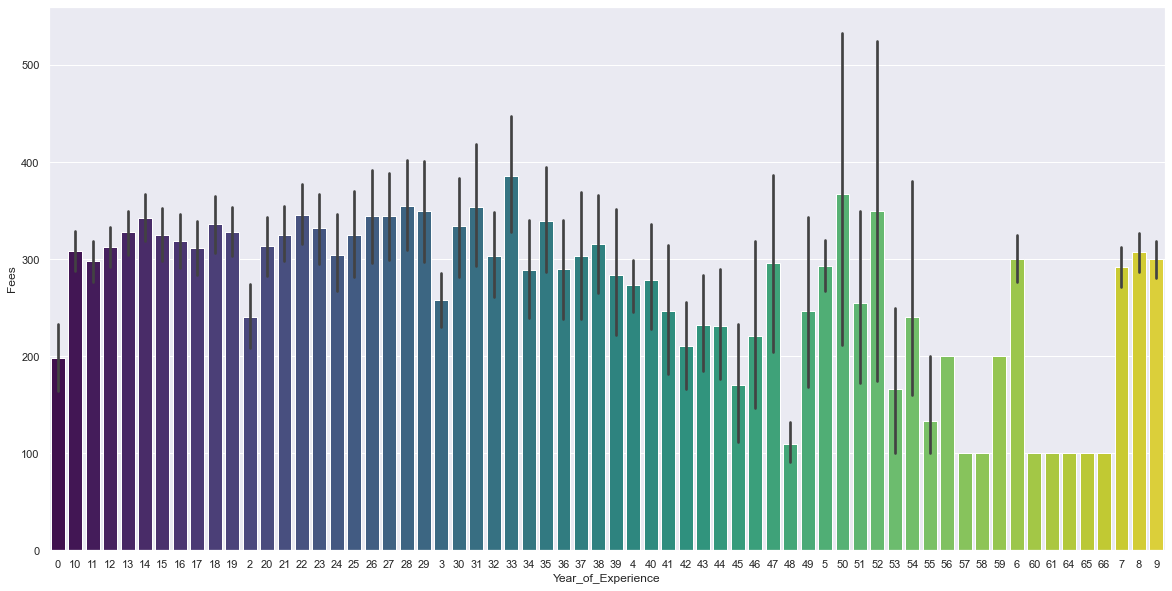

In [33]:
plt.subplots(figsize=(20,10))
sn.barplot(x='Year_of_Experience',y='Fees',data=df,palette='viridis')

#### Observation:We can see that fees is considerably more in doctors between 30 & 55 Years experience

###  Predicting Doctor's Consultation Fees.

In [34]:
df.columns

Index(['Qualification', 'Rating', 'Place', 'Profile', 'Fees', 'Region',
       'Year_of_Experience'],
      dtype='object')

In [35]:
df_full=df[[ 'Qualification', 'Rating', 'Place', 'Profile', 'Fees', 'Region','Year_of_Experience']]
df_full.head()

Qualification    Rating  \
3963                                                BDS  1.000000   
5187  Get inspired by remarkable stories of people l...  0.946435   
640                                                BAMS  0.946435   
383                                                 BDS  0.946435   
3804  Get inspired by remarkable stories of people l...  0.946435   

             Place  Profile  Fees  Region Year_of_Experience  
3963  Marathahalli        1   200       0                  0  
5187    HSR Layout        2   100       0                  0  
640   AS Rao Nagar        0   100       5                  0  
383      Chromepet        1   100       1                  0  
3804    HSR Layout        2   100       0                  0

In [36]:
df_new=df[[ 'Rating', 'Profile', 'Fees', 'Region','Year_of_Experience']]
df_new.head()

Rating  Profile  Fees  Region Year_of_Experience
3963  1.000000        1   200       0                  0
5187  0.946435        2   100       0                  0
640   0.946435        0   100       5                  0
383   0.946435        1   100       1                  0
3804  0.946435        2   100       0                  0

#### Feature Scaling

In [37]:
#create x and y variables
X = df_new.drop('Fees', axis=1)
Y = df_new["Fees"].copy()
#transform to array size
#feature scaling
scaler = RobustScaler()
df_new= scaler.fit_transform(df_new.astype(np.float64))

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = .20, random_state= 42)

In [39]:
#fit decision tree
tree = DecisionTreeRegressor()
tree.fit(x_train, y_train)
#fit random forest
forest = RandomForestRegressor(n_jobs=-1)
forest.fit(x_train, y_train)
#fit regression
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(x_train, y_train)
#fit ExtraTreesRegressor
ExtraTree = ExtraTreesRegressor()
ExtraTree.fit(x_train, y_train)

ExtraTreesRegressor()

In [40]:
models= [('lin_reg', lin_reg), ('random forest', forest), ('decision tree', tree), ('ExtraTree', ExtraTree)]
from sklearn.metrics import mean_squared_error
for i, model in models:    
    predictions = model.predict(x_train)
    MSE = mean_squared_error(y_train, predictions)
    RMSE = np.sqrt(MSE)
    msg = "%s = %.2f" % (i, round(RMSE, 2))
    print('RMSE of', msg)

RMSE of lin_reg = 188.89
RMSE of random forest = 116.11
RMSE of decision tree = 106.06
RMSE of ExtraTree = 106.09


In [41]:
for i, model in models:
    # Make predictions on train data
    predictions = model.predict(x_train)
    # Performance metrics
    errors = abs(predictions - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = np.mean(100 * (errors / y_train))
    # Calculate and display accuracy
    accuracy = 100 - mape    
    #print result
    msg = "%s= %.2f"% (i, round(accuracy, 2))
    print('Accuracy of', msg,'%')

Accuracy of lin_reg= 15.38 %
Accuracy of random forest= 55.62 %
Accuracy of decision tree= 67.35 %
Accuracy of ExtraTree= 67.18 %


In [42]:
models= [('lin_reg', lin_reg), ('forest', forest), ('dt', tree),('ExtraTree', ExtraTree)]
scoring = ['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2']

#for each model I want to test three different scoring metrics. Therefore, results[0] will be lin_reg x MSE, 
# results[1] lin_reg x MSE and so on until results [8], where we stored dt x r2

results= []
metric= []
for name, model in models:
    for i in scoring:
        scores = cross_validate(model, x_train, y_train, scoring=i, cv=10, return_train_score=True)
        results.append(scores)

In [43]:
#this is an example of the stored results
results[11]

{'fit_time': array([0.56567502, 0.56667519, 0.56569695, 0.57169175, 0.56167817,
        0.56369781, 0.56067848, 0.56067872, 0.56567597, 0.56665301]),
 'score_time': array([0.0239656 , 0.02398777, 0.02398682, 0.02396727, 0.02298665,
        0.02398658, 0.02298689, 0.02496648, 0.02398634, 0.02498674]),
 'test_score': array([-0.26429511, -0.16692756, -0.15025294, -0.09930826, -0.02965439,
        -0.06809201, -0.23899629, -0.07870676, -0.17673492, -0.26667605]),
 'train_score': array([0.71609254, 0.7055251 , 0.70884152, 0.71174705, 0.69839372,
        0.70544222, 0.71509659, 0.70938488, 0.71000933, 0.71049451])}

In [44]:
#This is for Linear regression
#if you change signa and square the Mean Square Error you get the RMSE, which is the most common metric to accuracy
LR_RMSE_mean = np.sqrt(-results[0]['test_score'].mean())
LR_RMSE_std= results[0]['test_score'].std()

# note that also here I changed the sign, as the result is originally a negative number for ease of computation
LR_MAE_mean = -results[1]['test_score'].mean()
LR_MAE_std= results[1]['test_score'].std()
LR_r2_mean = results[2]['test_score'].mean()
LR_r2_std = results[2]['test_score'].std()

#THIS IS FOR RF
RF_RMSE_mean = np.sqrt(-results[3]['test_score'].mean())
RF_RMSE_std= results[3]['test_score'].std()
RF_MAE_mean = -results[4]['test_score'].mean()
RF_MAE_std= results[4]['test_score'].std()
RF_r2_mean = results[5]['test_score'].mean()
RF_r2_std = results[5]['test_score'].std()

#THIS IS FOR DT
DT_RMSE_mean = np.sqrt(-results[6]['test_score'].mean())
DT_RMSE_std= results[6]['test_score'].std()
DT_MAE_mean = -results[7]['test_score'].mean()
DT_MAE_std= results[7]['test_score'].std()
DT_r2_mean = results[8]['test_score'].mean()
DT_r2_std = results[8]['test_score'].std()

#THIS IS FOR ET
ET_RMSE_mean = np.sqrt(-results[9]['test_score'].mean())
ET_RMSE_std= results[9]['test_score'].std()
ET_MAE_mean = -results[10]['test_score'].mean()
ET_MAE_std= results[10]['test_score'].std()
ET_r2_mean = results[11]['test_score'].mean()
ET_r2_std = results[11]['test_score'].std()

In [45]:
modelDF = pd.DataFrame({
    'Model'       : ['Linear Regression', 'Random Forest', 'Decision Trees','ExtraTree'],
    'RMSE_mean'    : [LR_RMSE_mean, RF_RMSE_mean, DT_RMSE_mean,ET_RMSE_mean],
    'RMSE_std'    : [LR_RMSE_std, RF_RMSE_std, DT_RMSE_std,ET_RMSE_std],
    'MAE_mean'   : [LR_MAE_mean, RF_MAE_mean, DT_MAE_mean,ET_MAE_mean],
    'MAE_std'   : [LR_MAE_std, RF_MAE_std, DT_MAE_std,ET_MAE_std],
    'r2_mean'      : [LR_r2_mean, RF_r2_mean, DT_r2_mean,ET_r2_mean],
    'r2_std'      : [LR_r2_std, RF_r2_std, DT_r2_std,ET_r2_std],
    }, columns = ['Model', 'RMSE_mean', 'RMSE_std', 'MAE_mean', 'MAE_std', 'r2_mean', 'r2_std'])

modelDF.sort_values(by='r2_mean', ascending=False)


Model   RMSE_mean     RMSE_std    MAE_mean   MAE_std   r2_mean  \
0  Linear Regression  189.126077  2676.208005  155.803147  5.804572  0.026200   
1      Random Forest  192.816957  2456.376941  147.544797  5.815683 -0.016304   
3          ExtraTree  205.336535  3053.196885  153.849895  7.004335 -0.153964   
2     Decision Trees  228.071218  5039.873281  166.561727  9.359032 -0.405632   

     r2_std  
0  0.014066  
1  0.056860  
3  0.080178  
2  0.137785

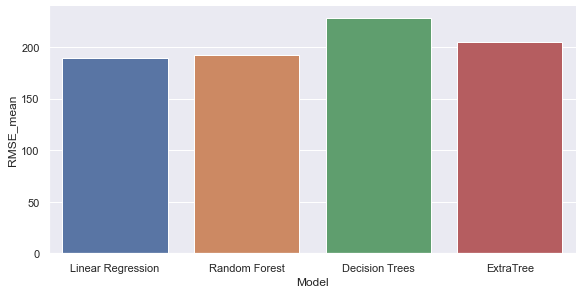

In [46]:
sn.factorplot(x= 'Model', y= 'RMSE_mean', data= modelDF, kind='bar', legend='True',size=4, aspect=2)

In [47]:
reg_decision_model=DecisionTreeRegressor()

In [48]:
reg_decision_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [49]:
reg_decision_model.score(x_train,y_train)*100

69.39522793210486

In [50]:
reg_decision_model.score(x_test,y_test)

-0.41703200533590956

In [51]:
prediction=reg_decision_model.predict(x_test)

<AxesSubplot:xlabel='Fees', ylabel='Density'>

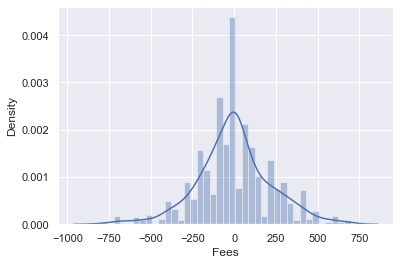

In [52]:
# checking difference between labled y and predicted y
sn.distplot(y_test-prediction)

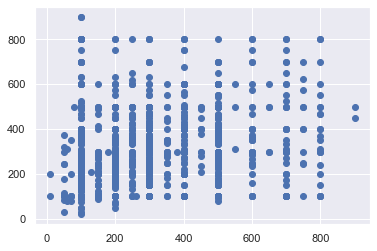

In [53]:
plt.scatter(y_test,prediction)

In [54]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [55]:
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV

In [56]:
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

In [57]:
# function for calculating how much time take for hyperparameter tuning

def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        #print(thour,":",tmin,':',round(tsec,2))

In [58]:
%%capture
from datetime import datetime

start_time=timer(None)

tuning_model.fit(X,Y)

timer(start_time)

In [59]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 11,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [60]:
# best model score
tuning_model.best_score_

-32389.403832475044

In [61]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=11,max_features='auto',max_leaf_nodes=20,min_samples_leaf=5,min_weight_fraction_leaf=0.1,splitter='best')

In [62]:
# fitting model
tuned_hyper_model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=11, max_features='auto', max_leaf_nodes=20,
                      min_samples_leaf=5, min_weight_fraction_leaf=0.1)

In [63]:
# prediction 
tuned_pred = tuned_hyper_model.predict(x_test)

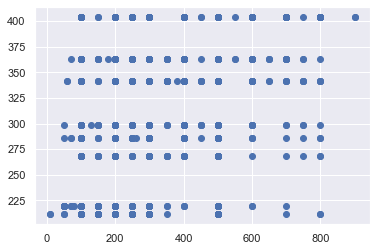

In [64]:
plt.scatter(y_test,tuned_pred)

In [65]:
# With hyperparameter tuned 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,tuned_pred))
print('MSE:', metrics.mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tuned_pred)))

MAE: 138.10858370054623
MSE: 30279.003187673254
RMSE: 174.00862963563978


In [66]:

# without hyperparameter tuning 

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 162.86262456924655
MSE: 49834.64636441643
RMSE: 223.23674958307475


In [67]:
# extract the numerical values of feature importance from the grid search
importances = reg_decision_model.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

   importance             feature
0    0.390153  Year_of_Experience
1    0.210721             Profile
2    0.203838              Rating
3    0.195288              Region


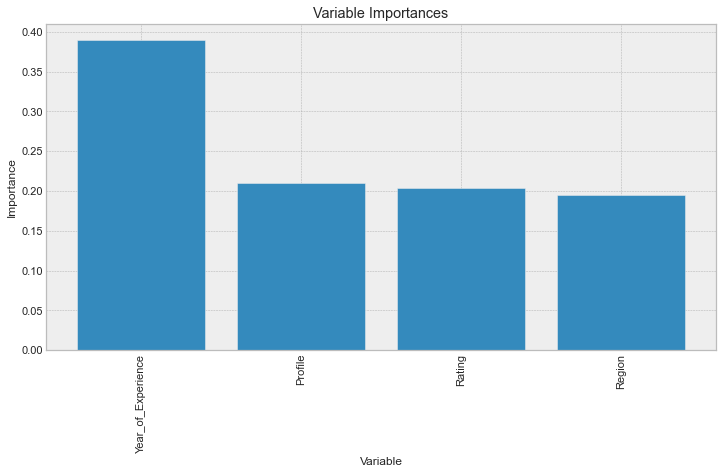

In [68]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(12,6))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Observation:A future aim may be to cut the less relevant features (lets say we can drop Region column in terms of importance),
estimate a new model and compare it with the old ones.
I reckon it would lose predictive power, but on the other hand it would improve in terms of training speed.

###### In conclusion, these are my final considerations on the model:

* The best feature to reliably predict the Consultation Fee of a Doctor is Year_of_Experience. 
* The features such as Profile and Rating are respectively on 2nd and 3rd in this ranking. Region is the less relevant feature in this cluster.

In [69]:
# Save the trained model as a pickle string.
FinalModel = pickle.dumps(reg_decision_model)
Final_mod_from_pickle = pickle.loads(FinalModel)
  
# Use the loaded model to make predictions
y_pred_test_Forestreg=Final_mod_from_pickle.predict(X)
y_pred_test_Forestreg

array([200.        , 133.33333333, 150.        , ..., 211.11111111,
       200.        , 250.        ])

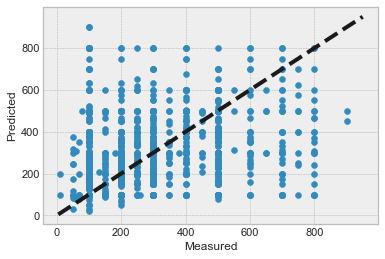

In [70]:
# cross_val_predict returns an array of the same size as `y` where each entry is a prediction obtained by cross validated:
predicted = y_pred_test_Forestreg

fig, ax = plt.subplots()
ax.scatter(y_test, prediction)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Conclusion:
#### * Year_of_Eperience play major role in Doctor's consultation fees.
#### * The Actual vs Predicted plot clearly indicates the predicted values are almost near linear hence performance of model is considerably acceptable
#### * Decision Tree Regressor model predicts the average price more accurately than linear regression model & Random Forest Model with a accuracy % 69.